In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/nirajmac/Documents/extra/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(52)

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print(df['occupation'].unique())

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


In [12]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [13]:
df['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [14]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [15]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [16]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [17]:
df.occupation.replace({'?':'others'},inplace=True)

In [18]:
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                   others
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48790, dtype: object

In [19]:
print(df['native-country'].unique().tolist())

['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']


In [20]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [21]:
df['native-country'].replace({'?':'others'},inplace=True)

In [22]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
others                          856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [23]:
df['workclass'].replace({'others':'NotListed'},inplace=True)

In [24]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [25]:
df['relationship'].value_counts()

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [26]:
df['race'].value_counts()

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [27]:
df['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [28]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']

In [29]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: count, dtype: int64

In [30]:
df.shape

(48759, 15)

In [31]:
df=df[df['education']!='5th-6th']
df=df[df['education']!='1st-4th']
df=df[df['education']!='Preschool']

In [32]:
df['education'].value_counts()

education
HS-grad         15754
Some-college    10858
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           951
Prof-school       834
9th               756
12th              655
Doctorate         594
Name: count, dtype: int64

In [33]:
df.shape

(47926, 15)

In [34]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
df.drop(columns=['education'], inplace=True)

In [36]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


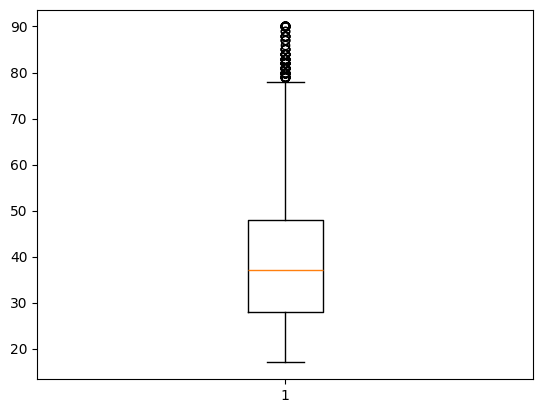

In [38]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

In [39]:
df=df[(df['age']<=75) & (df['age']>=17)]

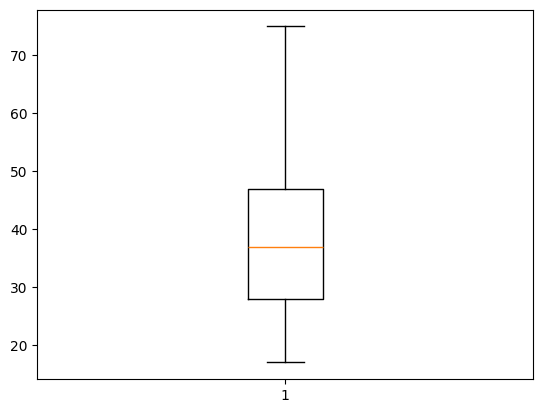

In [40]:
plt.boxplot(df['age'])
plt.show()

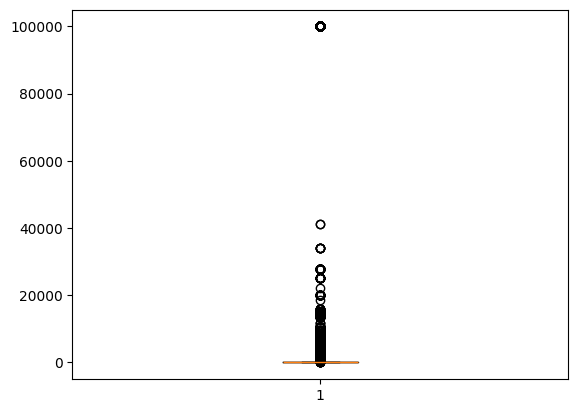

In [41]:
plt.boxplot(df['capital-gain'])
plt.show()

In [42]:
df=df[(df['capital-gain']<=80000)]

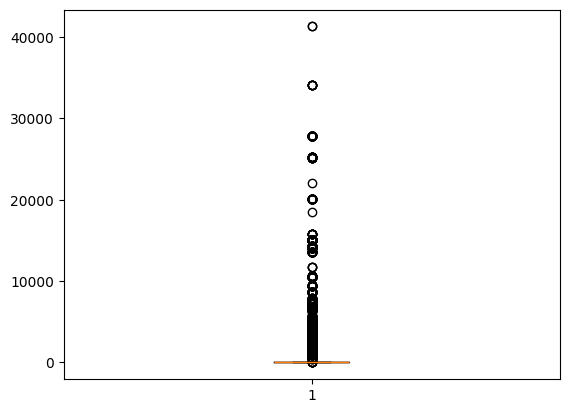

In [43]:
plt.boxplot(df['capital-gain'])
plt.show()

In [44]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K


Model Training

In [45]:
%pip install xgboost catboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [47]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 8 categorical features : ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [48]:
X = df.drop(columns=['income'],axis=1)

In [49]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States


In [50]:
Y= df['income']

In [51]:
Y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [52]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [53]:

X = preprocessor.fit_transform(X)

In [54]:
X.shape


(47333, 90)

In [55]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)
X_train.shape, X_test.shape

((37866, 90), (9467, 90))

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)   # now labels are 0 and 1
y_test = le.transform(y_test)


In [57]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Define classification models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost Classifier": CatBoostClassifier(verbose=0)
}

# To store results
clf_model_list = []
accuracy_list = []
f1_list = []
roc_auc_list = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    # Evaluate on test set
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc = roc_auc_score(y_test, y_pred_test)
    
    print(f"{name}")
    print("Model performance for Test set")
    print("- Accuracy Score: {:.4f}".format(acc))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc))
    print('----------------------------------')
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    print('='*40)
    print('\n')
    
    # Store results
    clf_model_list.append(name)
    accuracy_list.append(acc)
    f1_list.append(f1)
    roc_auc_list.append(roc)


Logistic Regression
Model performance for Test set
- Accuracy Score: 0.8518
- F1 Score: 0.6617
- ROC AUC Score: 0.7672
----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7198
           1       0.73      0.60      0.66      2269

    accuracy                           0.85      9467
   macro avg       0.81      0.77      0.78      9467
weighted avg       0.85      0.85      0.85      9467



Random Forest Classifier
Model performance for Test set
- Accuracy Score: 0.8544
- F1 Score: 0.6699
- ROC AUC Score: 0.7728
----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7198
           1       0.73      0.62      0.67      2269

    accuracy                           0.85      9467
   macro avg       0.81      0.77      0.79      9467
weighted avg       0.85      0.85     

In [59]:
# Create and sort DataFrame of classification models based on ROC AUC
classification_results_df = pd.DataFrame(
    list(zip(clf_model_list, accuracy_list, f1_list, roc_auc_list)),
    columns=['Model Name', 'Accuracy', 'F1 Score', 'ROC AUC']
).sort_values(by="ROC AUC", ascending=False)

print("🧠 Classification Model Results:")
print(classification_results_df)


🧠 Classification Model Results:
                 Model Name  Accuracy  F1 Score   ROC AUC
4       CatBoost Classifier  0.873350  0.712677  0.798711
3        XGBoost Classifier  0.870603  0.709233  0.797961
1  Random Forest Classifier  0.854442  0.669861  0.772847
0       Logistic Regression  0.851801  0.661683  0.767187
2       AdaBoost Classifier  0.858350  0.651235  0.753386
